In [ ]:
from google.colab import files
files.upload()

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("neww.csv")
df

,Datetime,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Radiation_Global_Tilted,Radiation_Diffuse_Tilted,month,Dates,Hour,year,false_data,power_before_24hr,Season,Active_Power
0,4/1/2016 0:00,15.695308,40.470138,2.656972,1.036526,246.619743,0.0,3.082348,1.688183,4,4/1/2016,0,2016,0,0.000000,2,0.000000
1,4/1/2016 1:00,15.458908,38.914876,2.409956,0.803828,54.343306,0.0,2.691869,1.369937,4,4/1/2016,1,2016,0,0.000000,2,0.000000
2,4/1/2016 2:00,15.686191,38.183398,2.349933,0.776835,68.148311,0.0,2.676784,1.350582,4,4/1/2016,2,2016,0,0.000000,2,0.000000
3,4/1/2016 3:00,14.938666,42.768116,3.003918,1.336927,168.825974,0.0,3.319331,1.908877,4,4/1/2016,3,2016,0,0.000000,2,0.000000
4,4/1/2016 4:00,13.401448,51.339947,3.034377,1.368935,228.932444,0.0,3.422762,2.012935,4,4/1/2016,4,2016,0,0.000000,2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61211,3/26/2023 11:00,35.306871,15.785003,959.409663,84.924482,9.487462,0.0,1036.722717,107.929555,3,3/26/2023,11,2023,0,168.274509,2,161.201923
61212,3/26/2023 12:00,36.248770,14.378119,1027.376404,98.990763,9.565769,0.0,1106.761993,99.427816,3,3/26/2023,12,2023,0,173.075996,2,167.881320
61213,3/26/2023 13:00,36.881080,13.816865,1008.710688,108.280804,9.300117,0.0,1099.391652,113.545848,3,3/26/2023,13,2023,0,171.358489,2,164.637970
61214,3/26/2023 14:00,37.641895,13.007947,897.121170,100.894153,9.271242,0.0,973.815954,123.373806,3,3/26/2023,14,2023,0,158.694468,2,157.420022


In [ ]:
X = df[['Weather_Temperature_Celsius','Weather_Relative_Humidity','Global_Horizontal_Radiation','Diffuse_Horizontal_Radiation','Wind_Direction','Weather_Daily_Rainfall','Radiation_Global_Tilted','Radiation_Diffuse_Tilted','Hour','month','year','Season','power_before_24hr']]
X_train = X[:49000]
y = df['Active_Power']
y_train = y[:49000]
X_val = X[49000:55200]
y_val = y[49000:55200]
X_test = X[55200:]
y_test = y[55200:]

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#model1 = RandomForestRegressor()
#model1=RandomForestRegressor()
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are already prepared

# Hyperparameter tuning (this is a simplified example)
best_score = float('inf')
best_n_estimators = 100
for n_estimators in [100, 200, 300]:
    model = RandomForestRegressor(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    val_predictions = model.predict(X_val)
    val_score = mean_squared_error(y_val, val_predictions)
    print(f'Validation MSE with {n_estimators} estimators: {val_score}')
    if val_score < best_score:
        best_score = val_score
        best_n_estimators = n_estimators

# Training the model with the best hyperparameters on train+val sets
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)
model = RandomForestRegressor(n_estimators=best_n_estimators)
model.fit(X_train_val, y_train_val)

# Making predictions on the test set
test_predictions = model.predict(X_test)

# Evaluating the model on the test set
test_error = mean_squared_error(y_test, test_predictions)
print(f'Test MSE: {test_error}')

Validation MSE with 100 estimators: 31.063073628334624
Validation MSE with 200 estimators: 31.000780638903507
Validation MSE with 300 estimators: 30.82549507104404


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Test MSE: 13.059767089047035


In [ ]:
import xgboost as xgb

model2 = xgb.XGBRegressor(learning_rate = 0.1177343215675419,
                          n_estimators = 385, max_depth = 5,
                          subsample = 0.9704135694834081,
                          colsample_bytree = 0.7418551892501086,
                          reg_alpha = 0.32527895432232745,
                          reg_lambda = 1.9198983396159308)

#model2 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model2.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7418551892501086, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1177343215675419, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=385, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model2.fit(X_val,y_val)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7418551892501086, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1177343215675419, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=385, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import r2_score

# Making predictions on the test set
prediction2 = model2.predict(X_test)

# Calculating the R² value
r2_value = r2_score(y_test, prediction2)
print(f'Model 2 R-squared (R2) value: {r2_value}')

Model 2 R-squared (R2) value: 0.9883556182549643


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

# Create meta ensemble predictions by taking the mean
meta_preds1 = np.mean([test_predictions, prediction2], axis=0)

# Evaluate meta ensemble model
meta_mse = mean_squared_error(y_test, meta_preds1)

print(f'Meta Ensemble Model Mean Squared Error: {meta_mse}')

# Calculate R2 score
meta_r2 = r2_score(y_test, meta_preds1)

print(f'Meta Ensemble Model R-squared (R2): {meta_r2}')
meta_mae = mean_absolute_error(y_test, meta_preds1)
print(f"Mean Absolute Error: {meta_mae}")

Meta Ensemble Model Mean Squared Error: 22.008577498365064
Meta Ensemble Model R-squared (R2): 0.9946482524535154
Mean Absolute Error: 2.3943251537747128


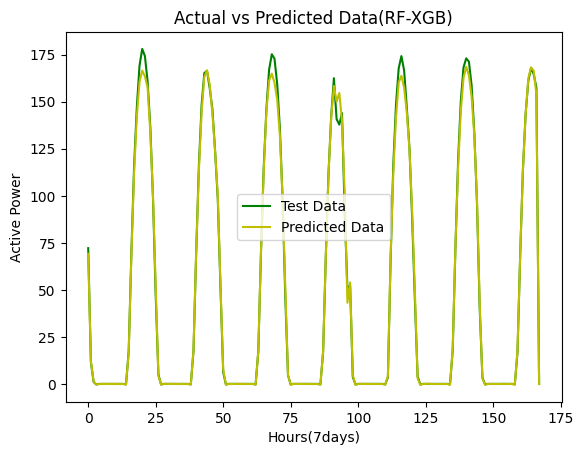

In [ ]:
import matplotlib.pyplot as plt

y_test11 = y_test[-168:]
y_pred = meta_preds1[-168:]

# Plotting test data
plt.plot(range(len(y_test11)), y_test11, 'g', label='Test Data')

# Plotting predicted data
plt.plot(range(len(y_pred)), y_pred, 'y', label='Predicted Data')

# Adding labels and legend
plt.title('Actual vs Predicted Data(RF-XGB)')
plt.xlabel('Hours(7days)')
plt.ylabel('Active Power')
plt.legend()

# Display the plot
plt.show()

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from sklearn.ensemble import ExtraTreesRegressor

# Define search space
search_spaces = {
    'n_estimators': (50, 300),
    'max_depth': (10, 40),
    'min_samples_split': (2, 15),
    'min_samples_leaf': (1, 6),
    'max_features': ['auto', 'sqrt', 'log2']
}

etr = ExtraTreesRegressor(random_state=42)
bayes_search = BayesSearchCV(estimator=etr, search_spaces=search_spaces, n_iter=10, cv=5, n_jobs=-1, verbose=2)
bayes_search.fit(X_train, y_train)

# Best parameter after optimization
best_params = bayes_search.best_params_

print("Best parameters found by random search:", best_params)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters found by random search: OrderedDict([('max_depth', 31), ('max_features', 'auto'), ('min_samples_leaf', 3), ('min_samples_split', 10), ('n_estimators', 66)])


In [ ]:
bayes_search.fit(X_val, y_val)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


BayesSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42), n_iter=10,
              n_jobs=-1,
              search_spaces={'max_depth': (10, 40),
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': (1, 6),
                             'min_samples_split': (2, 15),
                             'n_estimators': (50, 300)},
              verbose=2)

In [ ]:
# Make predictions on the validation set
prediction3 = bayes_search.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
# Calculating the R² value
r2_value = r2_score(y_test, prediction3)
print(f'Model 1 R-squared (R2) value: {r2_value}')

Model 1 R-squared (R2) value: 0.9934110809618999


In [ ]:
# Calculating the R² value
r2_value = r2_score(y_test, prediction3)
print(f'Model 1 R-squared (R2) value: {r2_value}')

Model 1 R-squared (R2) value: 0.9936686214375542


In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

model3 = ExtraTreesRegressor(n_estimators=100, max_depth=10)
model3.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=10)

In [ ]:
model3.fit(X_val, y_val)

ExtraTreesRegressor(max_depth=10)

In [ ]:
prediction3 = model3.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Create meta ensemble predictions by taking the mean
meta_preds5 = np.mean([test_predictions, prediction3], axis=0)

# Evaluate meta ensemble model
meta_mse = mean_squared_error(y_test, meta_preds5)

print(f'Meta Ensemble Model Mean Squared Error: {meta_mse}')

# Calculate R2 score
meta_r2 = r2_score(y_test, meta_preds5)

print(f'Meta Ensemble Model R-squared (R2): {meta_r2}')
meta_mae = mean_absolute_error(y_test, meta_preds5)
print(f"Mean Absolute Error: {meta_mae}")

Meta Ensemble Model Mean Squared Error: 15.920652397266823
Meta Ensemble Model R-squared (R2): 0.9961286315568629
Mean Absolute Error: 1.987694168196032


In [ ]:
train_predictions = model.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
val_predictions = model.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
train_predictions3 = model3.predict(X_train)
val_predictions3 = model3.predict(X_val)

In [ ]:
train_meta_preds5 = np.mean([train_predictions, train_predictions3], axis=0)

In [ ]:
# Calculate training R-squared (R2)
train_r2 = r2_score(y_train, train_meta_preds5)
print(f'Training R-squared (R2): {train_r2}')

# Calculate training RMSE
train_rmse = mean_squared_error(y_train, train_meta_preds5)
print(f'Training Root Mean Squared Error (RMSE): {train_rmse}')

train_mae = mean_absolute_error(y_train, train_meta_preds5)
print(f'Training Root Mean Squared Error (RMSE): {train_mae}')

Training R-squared (R2): 0.9938847736000753
Training Root Mean Squared Error (RMSE): 25.078460823347008
Training Root Mean Squared Error (RMSE): 2.4303319997385886


In [ ]:
val_meta_preds5 = np.mean([val_predictions, val_predictions3], axis=0)

In [ ]:
# Calculate training R-squared (R2)
val_r2 = r2_score(y_val, val_meta_preds5)
print(f'Training R-squared (R2): {val_r2}')

# Calculate training RMSE
val_rmse = mean_squared_error(y_val, val_meta_preds5)
print(f'Training Root Mean Squared Error (RMSE): {val_rmse}')

val_mae = mean_absolute_error(y_val, val_meta_preds5)
print(f'Training Root Mean Squared Error (RMSE): {val_mae}')

Training R-squared (R2): 0.9995911275674212
Training Root Mean Squared Error (RMSE): 1.589654643106171
Training Root Mean Squared Error (RMSE): 0.6344756901598838


In [ ]:
test_results = pd.DataFrame(X_test)

# Add actual values
test_results['Actual'] = y_test

# Add predicted values
test_results['Predicted'] = meta_preds5

# Save to CSV
test_results.to_csv('test_data_with_forecasted.csv', index=False)

from google.colab import files
files.download('test_data_with_forecasted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Create meta ensemble predictions by taking the mean
meta_preds5 = np.mean([test_predictions, prediction3], axis=0)

# Evaluate meta ensemble model
meta_mse = mean_squared_error(y_test, meta_preds5)

print(f'Meta Ensemble Model Mean Squared Error: {meta_mse}')

# Calculate R2 score
meta_r2 = r2_score(y_test, meta_preds5)

print(f'Meta Ensemble Model R-squared (R2): {meta_r2}')
meta_mae = mean_absolute_error(y_test, meta_preds5)
print(f"Mean Absolute Error: {meta_mae}")

Meta Ensemble Model Mean Squared Error: 16.18038050432474
Meta Ensemble Model R-squared (R2): 0.996065474396442


NameError: name 'mean_absolute_error' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Create meta ensemble predictions by taking the mean
meta_preds3 = np.mean([prediction2, prediction3], axis=0)

# Evaluate meta ensemble model
meta_mse = mean_squared_error(y_test, meta_preds3)

print(f'Meta Ensemble Model Mean Squared Error: {meta_mse}')

# Calculate R2 score
meta_r2 = r2_score(y_test, meta_preds3)

print(f'Meta Ensemble Model R-squared (R2): {meta_r2}')
meta_mae = mean_absolute_error(y_test, meta_preds3)
print(f"Mean Absolute Error: {meta_mae}")

Meta Ensemble Model Mean Squared Error: 33.39859248150922
Meta Ensemble Model R-squared (R2): 0.9918785830032752
Mean Absolute Error: 2.9277188561635343


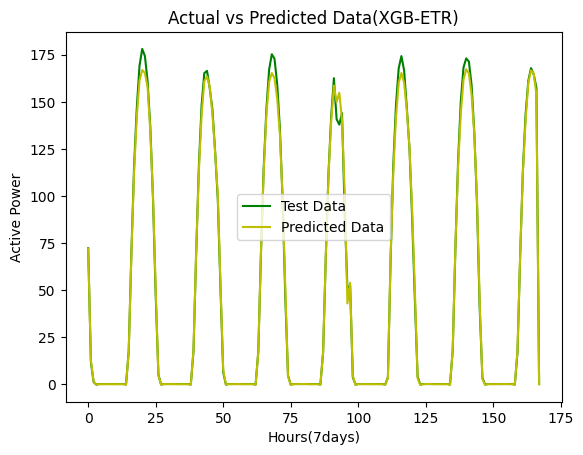

In [ ]:
import matplotlib.pyplot as plt

y_test11 = y_test[-168:]
y_pred = meta_preds3[-168:]

# Plotting test data
plt.plot(range(len(y_test11)), y_test11, 'g', label='Test Data')

# Plotting predicted data
plt.plot(range(len(y_pred)), y_pred, 'y', label='Predicted Data')

# Adding labels and legend
plt.title('Actual vs Predicted Data(XGB-ETR)')
plt.xlabel('Hours(7days)')
plt.ylabel('Active Power')
plt.legend()

# Display the plot
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Create meta ensemble predictions by taking the mean
meta_preds5 = np.mean([test_predictions, prediction3], axis=0)

# Evaluate meta ensemble model
meta_mse = mean_squared_error(y_test, meta_preds5)

print(f'Meta Ensemble Model Mean Squared Error: {meta_mse}')

# Calculate R2 score
meta_r2 = r2_score(y_test, meta_preds5)

print(f'Meta Ensemble Model R-squared (R2): {meta_r2}')
meta_mae = mean_absolute_error(y_test, meta_preds5)
print(f"Mean Absolute Error: {meta_mae}")

Meta Ensemble Model Mean Squared Error: 15.306558403045207
Meta Ensemble Model R-squared (R2): 0.9962779586102416
Mean Absolute Error: 1.9511116465869118


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
ereg = VotingRegressor(estimators=[('model1', model), ('model2', model2), ('model3', model3)])

ereg = ereg.fit(X_train_xgb, y_train1)

train_preds = ereg.predict(X_train_xgb)

# Calculate training R-squared (R2)
train_r2 = r2_score(y_train1, train_preds)
print(f'Training R-squared (R2): {train_r2}')

# Calculate training RMSE
train_rmse = np.sqrt(mean_squared_error(y_train1, train_preds))
print(f'Training Root Mean Squared Error (RMSE): {train_rmse}')

train_mae = np.mean_absolute_error(y_train1, train_preds)
print(f'Training Root Mean Squared Error (RMSE): {train_maee}')

# Predict on validation set
val_preds = ereg.predict(X_val_xgb)

# Evaluate ensemble model on validation set
val_mse = mean_squared_error(y_val1, val_preds)
print(f'Validation Mean Squared Error: {val_mse}')

val_r2 = r2_score(y_val1, val_preds)
print(f'Validation R-squared (R2): {val_r2}')

val_mae = mean_absolute_error(y_val1, val_preds)
print(f"Validation Mean Absolute Error: {val_mae}")

meta_preds2 = ereg.predict(X_test_xgb)

# Evaluate meta ensemble model
meta_mse = mean_squared_error(y_test1, meta_preds2)
print(f'Meta Ensemble Model Mean Squared Error: {meta_mse}')

# Calculate R2 score
meta_r2 = r2_score(y_test1, meta_preds2)
print(f'Meta Ensemble Model R-squared (R2): {meta_r2}')

meta_mae = mean_absolute_error(y_test1, meta_preds2)
print(f"Mean Absolute Error: {meta_mae}")

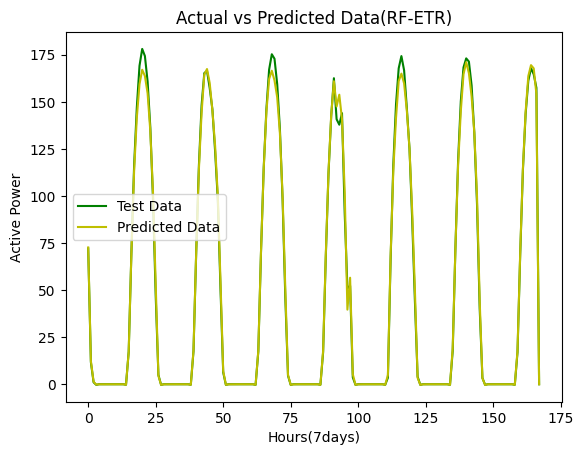

In [ ]:
import matplotlib.pyplot as plt

y_test11 = y_test[-168:]
y_pred = meta_preds5[-168:]

# Plotting test data
plt.plot(range(len(y_test11)), y_test11, 'g', label='Test Data')

# Plotting predicted data
plt.plot(range(len(y_pred)), y_pred, 'y', label='Predicted Data')

# Adding labels and legend
plt.title('Actual vs Predicted Data(RF-ETR)')
plt.xlabel('Hours(7days)')
plt.ylabel('Active Power')
plt.legend()

# Display the plot
plt.show()

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
ereg1 = VotingRegressor(estimators=[('model1', model),('model2', model2), ('model3', bayes_search)])

ereg1 = ereg1.fit(X_train, y_train)

# Predict on validation set
val_preds = ereg1.predict(X_val)

# Evaluate ensemble model on validation set
val_mse = mean_squared_error(y_val, val_preds)
print(f'Validation Mean Squared Error: {val_mse}')

val_r2 = r2_score(y_val, val_preds)
print(f'Validation R-squared (R2): {val_r2}')

val_mae = mean_absolute_error(y_val, val_preds)
print(f"Validation Mean Absolute Error: {val_mae}")

meta_preds4 = ereg1.predict(X_test)

# Evaluate meta ensemble model
meta_mse = mean_squared_error(y_test, meta_preds4)
print(f'Meta Ensemble Model Mean Squared Error: {meta_mse}')

# Calculate R2 score
meta_r2 = r2_score(y_test, meta_preds4)
print(f'Meta Ensemble Model R-squared (R2): {meta_r2}')

meta_mae = mean_absolute_error(y_test, meta_preds4)
print(f"Mean Absolute Error: {meta_mae}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Validation Mean Squared Error: 31.980244049304268
Validation R-squared (R2): 0.9917744145021639
Validation Mean Absolute Error: 2.7342759011697573
Meta Ensemble Model Mean Squared Error: 38.41198195845659
Meta Ensemble Model R-squared (R2): 0.9906594949075173
Mean Absolute Error: 3.262244425958774


In [ ]:
import math
#meta_mse = mean_squared_error(y_test, meta_preds2)
rmse = math.sqrt(meta_mse)
print(f'Meta Ensemble Model Mean Squared Error: {rmse}')

Meta Ensemble Model Mean Squared Error: 6.191136732417122


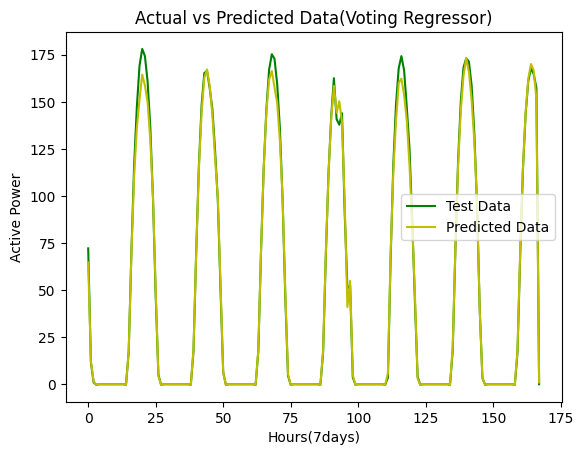

In [ ]:
import matplotlib.pyplot as plt

y_test11 = y_test[-168:]
y_pred = meta_preds4[-168:]

# Plotting test data
plt.plot(range(len(y_test11)), y_test11, 'g', label='Test Data')

# Plotting predicted data
plt.plot(range(len(y_pred)), y_pred, 'y', label='Predicted Data')

# Adding labels and legend
plt.title('Actual vs Predicted Data(Voting Regressor)')
plt.xlabel('Hours(7days)')
plt.ylabel('Active Power')
plt.legend()

# Display the plot
plt.show()

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd

import datetime
df1 = pd.read_csv("neww.csv")
df1.head()
 # Read the existing CSV file into a DataFrame
df1.isnull().sum()

Datetime                        0
Weather_Temperature_Celsius     0
Weather_Relative_Humidity       0
Global_Horizontal_Radiation     0
Diffuse_Horizontal_Radiation    0
Wind_Direction                  0
Weather_Daily_Rainfall          0
Radiation_Global_Tilted         0
Radiation_Diffuse_Tilted        0
month                           0
Dates                           0
Hour                            0
year                            0
false_data                      0
power_before_24hr               0
Season                          0
Active_Power                    0
dtype: int64

In [ ]:
df1.fillna(0, inplace=True)

In [ ]:
df1.index = pd.to_datetime(df['Datetime'], format='%m/%d/%Y %H:%M')
df1.head()

,Datetime,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Radiation_Global_Tilted,Radiation_Diffuse_Tilted,month,Dates,Hour,year,false_data,power_before_24hr,Season,Active_Power
Datetime,,,,,,,,,,,,,,,,,
2016-04-01 00:00:00,4/1/2016 0:00,15.695308,40.470138,2.656972,1.036526,246.619743,0.0,3.082348,1.688183,4,4/1/2016,0,2016,0,0.0,2,0.0
2016-04-01 01:00:00,4/1/2016 1:00,15.458908,38.914876,2.409956,0.803828,54.343306,0.0,2.691869,1.369937,4,4/1/2016,1,2016,0,0.0,2,0.0
2016-04-01 02:00:00,4/1/2016 2:00,15.686191,38.183398,2.349933,0.776835,68.148311,0.0,2.676784,1.350582,4,4/1/2016,2,2016,0,0.0,2,0.0
2016-04-01 03:00:00,4/1/2016 3:00,14.938666,42.768116,3.003918,1.336927,168.825974,0.0,3.319331,1.908877,4,4/1/2016,3,2016,0,0.0,2,0.0
2016-04-01 04:00:00,4/1/2016 4:00,13.401448,51.339947,3.034377,1.368935,228.932444,0.0,3.422762,2.012935,4,4/1/2016,4,2016,0,0.0,2,0.0


<Axes: xlabel='Datetime'>

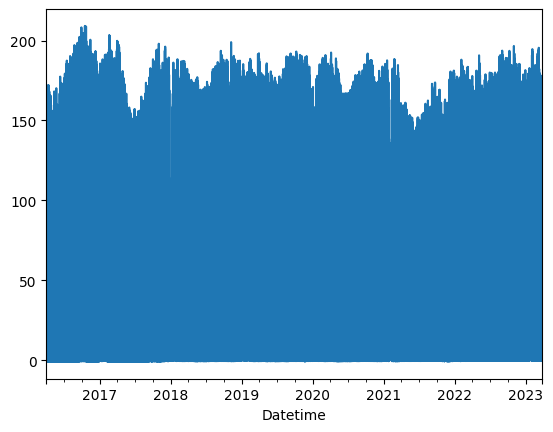

In [ ]:
temp = df1['Active_Power']
temp.plot()

In [ ]:
def df_to_X_y(df1, window_size=3):
  df_as_np = df1.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
import numpy as np
WINDOW_SIZE = 3
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((61213, 3, 1), (61213,))

In [ ]:
X_train1, y_train1 = X1[:49000], y1[:49000]
X_val1, y_val1 = X1[49000:55200], y1[49000:55200]
X_test1, y_test1 = X1[55200:], y1[55200:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((49000, 3, 1), (49000,), (6200, 3, 1), (6200,), (6013, 3, 1), (6013,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, Accuracy
from tensorflow.keras.optimizers import Adam

model4 = Sequential()
model4.add(InputLayer((3, 1)))
model4.add(LSTM(units= 128))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 8)                 1032      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 67601 (264.07 KB)
Trainable params: 67601 (264.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow import keras
import tensorflow as tf
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + keras.backend.epsilon())

In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),r_squared])

In [ ]:
model4.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1532/1532 [==============================] - 18s 10ms/step - loss: 4123.7534 - root_mean_squared_error: 64.2165 - r_squared: -0.0196 - val_loss: 2008.0591 - val_root_mean_squared_error: 44.8114 - val_r_squared: -25664546.0000
Epoch 2/10
1532/1532 [==============================] - 18s 12ms/step - loss: 1177.5204 - root_mean_squared_error: 34.3150 - r_squared: 0.7096 - val_loss: 469.6993 - val_root_mean_squared_error: 21.6725 - val_r_squared: -4652264.0000
Epoch 3/10
1532/1532 [==============================] - 16s 10ms/step - loss: 312.5781 - root_mean_squared_error: 17.6799 - r_squared: 0.9217 - val_loss: 155.4536 - val_root_mean_squared_error: 12.4681 - val_r_squared: -1550049.5000
Epoch 4/10
1532/1532 [==============================] - 14s 9ms/step - loss: 156.4805 - root_mean_squared_error: 12.5092 - r_squared: 0.9597 - val_loss: 122.1716 - val_root_mean_squared_error: 11.0531 - val_r_squared: -818647.1875
Epoch 5/10
1532/1532 [==============================] - 14s 9ms/s

In [ ]:
df1.isnull().sum()

Datetime                        0
Weather_Temperature_Celsius     0
Weather_Relative_Humidity       0
Global_Horizontal_Radiation     0
Diffuse_Horizontal_Radiation    0
Wind_Direction                  0
Weather_Daily_Rainfall          0
Radiation_Global_Tilted         0
Radiation_Diffuse_Tilted        0
month                           0
Dates                           0
Hour                            0
year                            0
false_data                      0
power_before_24hr               0
Season                          0
Active_Power                    0
dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = model4.predict(X_test1)

# Evaluate the ensemble model
mse = mean_squared_error(y_test1, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error on the test set: {rmse}")

188/188 [==============================] - 1s 3ms/step
Root Mean Squared Error on the test set: 13.679436103496602


In [ ]:
model5 = Sequential()
model5.add(InputLayer((3, 1)))
model5.add(Conv1D(64, kernel_size=2))
model5.add(Flatten())
model5.add(Dense(8, 'relu'))
model5.add(Dense(1, 'linear'))

model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 1032      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1233 (4.82 KB)
Trainable params: 1233 (4.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp2 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),r_squared])

In [ ]:
model5.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1532/1532 [==============================] - 6s 3ms/step - loss: 1369.1663 - root_mean_squared_error: 37.0022 - r_squared: 0.6512 - val_loss: 344.5922 - val_root_mean_squared_error: 18.5632 - val_r_squared: -5664603.5000
Epoch 2/10
1532/1532 [==============================] - 4s 2ms/step - loss: 291.0720 - root_mean_squared_error: 17.0608 - r_squared: 0.9232 - val_loss: 217.5517 - val_root_mean_squared_error: 14.7496 - val_r_squared: -19214156.0000
Epoch 3/10
1532/1532 [==============================] - 4s 2ms/step - loss: 229.0276 - root_mean_squared_error: 15.1337 - r_squared: 0.9390 - val_loss: 194.5299 - val_root_mean_squared_error: 13.9474 - val_r_squared: -35746864.0000
Epoch 4/10
1532/1532 [==============================] - 5s 3ms/step - loss: 215.6953 - root_mean_squared_error: 14.6866 - r_squared: 0.9426 - val_loss: 190.6262 - val_root_mean_squared_error: 13.8067 - val_r_squared: -57267432.0000
Epoch 5/10
1532/1532 [==============================] - 3s 2ms/step - lo

In [ ]:
# Make predictions on the test set
y_pred2 = model5.predict(X_test1)

# Evaluate the ensemble model
mse = mean_squared_error(y_test1, y_pred2)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error on the test set: {rmse}")

188/188 [==============================] - 0s 1ms/step
Root Mean Squared Error on the test set: 16.400350339693127


In [ ]:
from tensorflow.keras.models import Sequential, Model

concatenated = concatenate([model4.output, model5.output])

# Add a dense layer for further processing
merged = Dense(64, activation='relu')(concatenated)

# Output layer for the final prediction
output_layer = Dense(1, activation='linear')(merged)

# Create the ensemble model
ensemble_model = Model(inputs=[model4.input, model5.input], outputs=output_layer)

# Compile the model
ensemble_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the ensemble model
ensemble_model.fit([X_train1, X_train1], y_train1, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
# Train the ensemble model
history = ensemble_model.fit([X_train1, X_train1], y_train1, epochs=10, batch_size=32, validation_data=(X_val1,y_val1))

Epoch 1/10
1532/1532 [==============================] - 15s 8ms/step - loss: 132.2610 - val_loss: 118.7666
Epoch 2/10
1532/1532 [==============================] - 13s 9ms/step - loss: 130.2736 - val_loss: 116.4299
Epoch 3/10
1532/1532 [==============================] - 13s 9ms/step - loss: 128.6111 - val_loss: 116.0432
Epoch 4/10
1532/1532 [==============================] - 12s 8ms/step - loss: 128.6587 - val_loss: 112.9190
Epoch 5/10
1532/1532 [==============================] - 12s 8ms/step - loss: 126.4604 - val_loss: 123.2573
Epoch 6/10
1532/1532 [==============================] - 12s 8ms/step - loss: 126.5591 - val_loss: 113.5369
Epoch 7/10
1532/1532 [==============================] - 12s 8ms/step - loss: 125.1747 - val_loss: 112.8176
Epoch 8/10
1532/1532 [==============================] - 12s 8ms/step - loss: 125.8202 - val_loss: 116.8997
Epoch 9/10
1532/1532 [==============================] - 14s 9ms/step - loss: 124.6981 - val_loss: 114.2237
Epoch 10/10
1532/1532 [==============

In [ ]:
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Make predictions on the test set
y_pred3 = ensemble_model.predict([X_test1, X_test1])

# Evaluate the ensemble model
mse = mean_squared_error(y_test1, y_pred3)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error on the test set: {rmse}")

mae = mean_absolute_error(y_test1, y_pred3)
print(f"Mean Absolute Error: {mae}")

188/188 [==============================] - 2s 4ms/step
Root Mean Squared Error on the test set: 13.965072267684583
Mean Absolute Error: 7.148304088725741


In [ ]:
model6 = Sequential()
model6.add(InputLayer((3, 1)))
model6.add(GRU(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(1, 'linear'))
model6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp3 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), r_squared])

In [ ]:
model6.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1532/1532 [==============================] - 13s 7ms/step - loss: 4697.9761 - root_mean_squared_error: 68.5418 - r_squared: -0.1616 - val_loss: 2782.5435 - val_root_mean_squared_error: 52.7498 - val_r_squared: -41497676.0000
Epoch 2/10
1532/1532 [==============================] - 10s 7ms/step - loss: 1992.3314 - root_mean_squared_error: 44.6355 - r_squared: 0.5111 - val_loss: 1054.8101 - val_root_mean_squared_error: 32.4778 - val_r_squared: -3964711.5000
Epoch 3/10
1532/1532 [==============================] - 10s 7ms/step - loss: 733.3664 - root_mean_squared_error: 27.0807 - r_squared: 0.8198 - val_loss: 346.1356 - val_root_mean_squared_error: 18.6047 - val_r_squared: -342356.4688
Epoch 4/10
1532/1532 [==============================] - 11s 7ms/step - loss: 272.2195 - root_mean_squared_error: 16.4991 - r_squared: 0.9322 - val_loss: 155.2686 - val_root_mean_squared_error: 12.4607 - val_r_squared: -2053140.1250
Epoch 5/10
1532/1532 [==============================] - 9s 6ms/step

In [ ]:
# Make predictions on the test set
y_pred4 = model6.predict(X_test1)

# Evaluate the ensemble model
mse = mean_squared_error(y_test1, y_pred4)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error on the test set: {rmse}")

188/188 [==============================] - 1s 2ms/step
Root Mean Squared Error on the test set: 13.626331996267073


In [ ]:
from tensorflow.keras.models import Sequential, Model

concatenated = concatenate([model5.output, model6.output])

# Add a dense layer for further processing
merged = Dense(64, activation='relu')(concatenated)

# Output layer for the final prediction
output_layer = Dense(1, activation='linear')(merged)

# Create the ensemble model
ensemble_model2 = Model(inputs=[model5.input, model6.input], outputs=output_layer)

# Compile the model
ensemble_model2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the ensemble model
ensemble_model2.fit([X_train1, X_train1], y_train1, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
history = ensemble_model2.fit([X_train1, X_train1], y_train1, epochs=10, batch_size=32, validation_data=(X_val1, y_val1))

Epoch 1/10
1532/1532 [==============================] - 9s 5ms/step - loss: 128.0555 - val_loss: 115.0081
Epoch 2/10
1532/1532 [==============================] - 8s 5ms/step - loss: 126.7467 - val_loss: 134.8452
Epoch 3/10
1532/1532 [==============================] - 8s 5ms/step - loss: 125.9756 - val_loss: 115.1925
Epoch 4/10
1532/1532 [==============================] - 7s 5ms/step - loss: 125.6381 - val_loss: 112.9734
Epoch 5/10
1532/1532 [==============================] - 8s 5ms/step - loss: 125.7138 - val_loss: 117.8647
Epoch 6/10
1532/1532 [==============================] - 7s 5ms/step - loss: 124.6964 - val_loss: 115.9235
Epoch 7/10
1532/1532 [==============================] - 8s 5ms/step - loss: 124.7651 - val_loss: 133.7757
Epoch 8/10
1532/1532 [==============================] - 8s 5ms/step - loss: 123.7959 - val_loss: 117.8903
Epoch 9/10
1532/1532 [==============================] - 7s 5ms/step - loss: 123.8698 - val_loss: 111.2871
Epoch 10/10
1532/1532 [=======================

In [ ]:
# Make predictions on the test set
y_pred5 = ensemble_model2.predict([X_test1, X_test1])

# Evaluate the ensemble model
mse = mean_squared_error(y_test1, y_pred5)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error on the test set: {rmse}")

mae = mean_absolute_error(y_test1, y_pred5)
print(f"Mean Absolute Error: {mae}")

188/188 [==============================] - 1s 2ms/step
Root Mean Squared Error on the test set: 13.5879457778739
Mean Absolute Error: 6.251022258194264


In [ ]:
concatenated = concatenate([model4.output, model6.output])

# Add a dense layer for further processing
merged = Dense(64, activation='relu')(concatenated)

# Output layer for the final prediction
output_layer = Dense(1, activation='linear')(merged)

# Create the ensemble model
ensemble_model3 = Model(inputs=[model4.input, model6.input], outputs=output_layer)

# Compile the model
ensemble_model3.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
ensemble_model3.fit([X_train1, X_train1], y_train1, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
history = ensemble_model3.fit([X_train1, X_train1], y_train1, epochs=10, batch_size=32, validation_data=(X_val1, y_val1))

Epoch 1/10
1532/1532 [==============================] - 17s 9ms/step - loss: 127.2314 - val_loss: 111.7109
Epoch 2/10
1532/1532 [==============================] - 14s 9ms/step - loss: 126.0992 - val_loss: 117.5455
Epoch 3/10
1532/1532 [==============================] - 26s 17ms/step - loss: 125.7186 - val_loss: 109.1144
Epoch 4/10
1532/1532 [==============================] - 31s 20ms/step - loss: 125.6599 - val_loss: 124.5880
Epoch 5/10
1532/1532 [==============================] - 19s 12ms/step - loss: 124.7079 - val_loss: 115.5975
Epoch 6/10
1532/1532 [==============================] - 14s 9ms/step - loss: 124.5047 - val_loss: 116.0422
Epoch 7/10
1532/1532 [==============================] - 15s 9ms/step - loss: 124.1478 - val_loss: 116.5893
Epoch 8/10
1532/1532 [==============================] - 14s 9ms/step - loss: 123.0504 - val_loss: 110.6940
Epoch 9/10
1532/1532 [==============================] - 15s 10ms/step - loss: 122.9363 - val_loss: 111.1788
Epoch 10/10
1532/1532 [==========

In [ ]:
# Make predictions on the test set
y_pred6 = ensemble_model3.predict([X_test1, X_test1])

# Evaluate the ensemble model
mse = mean_squared_error(y_test1, y_pred6)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error on the test set: {rmse}")
mae = mean_absolute_error(y_test1, y_pred6)
print(f"Mean Absolute Error: {mae}")

188/188 [==============================] - 2s 5ms/step
Root Mean Squared Error on the test set: 13.357839432876833
Mean Absolute Error: 6.507120016674117


In [ ]:
X_train_xgb = X_train1.reshape(X_train1.shape[0], -1)
X_val_xgb = X_val1.reshape(X_val1.shape[0], -1)
X_test_xgb = X_test1.reshape(X_test1.shape[0], -1)

In [ ]:
from xgboost import XGBRegressor

model7 = XGBRegressor(learning_rate = 0.05307471972095628,
                      n_estimators = 491,
                      max_depth = 3,
                      subsample = 0.512344355190912,
                      colsample_bytree = 0.8124902358397642,
                      reg_alpha = 0.7018885928352334,
                      reg_lambda = 3.3033937113181446)
model7.fit(X_train_xgb, y_train1)
model7.fit(X_train_xgb, y_train1, eval_set=[(X_val1.reshape(X_val1.shape[0], -1), y_val1)], early_stopping_rounds=5, verbose=False)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8124902358397642, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05307471972095628, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=491, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
model8 = Sequential()
model8.add(LSTM(units=50, activation='relu', input_shape=(3, 1)))
model8.add(Dense(8, 'relu'))
model8.add(Dense(1, 'linear'))
model8.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')
model8.fit(X_train1, y_train1, epochs=10, batch_size=32, validation_data=(X_val1, y_val1), verbose=0)

In [ ]:
X_test_lstm = X_test1.reshape((X_test1.shape[0], 3, 1))
X_test_xgb = X_test1.reshape(X_test1.shape[0], -1)

lstm_predictions = model8.predict(X_test1)
xgb_predictions = model7.predict(X_test_xgb)

lstm_predictions = lstm_predictions.reshape(X_test1.shape[0], 1)
xgb_predictions = xgb_predictions.reshape(X_test1.shape[0], 1)

# Make predictions using the hybrid model
predictions7 = (lstm_predictions + xgb_predictions)/2

188/188 [==============================] - 1s 2ms/step


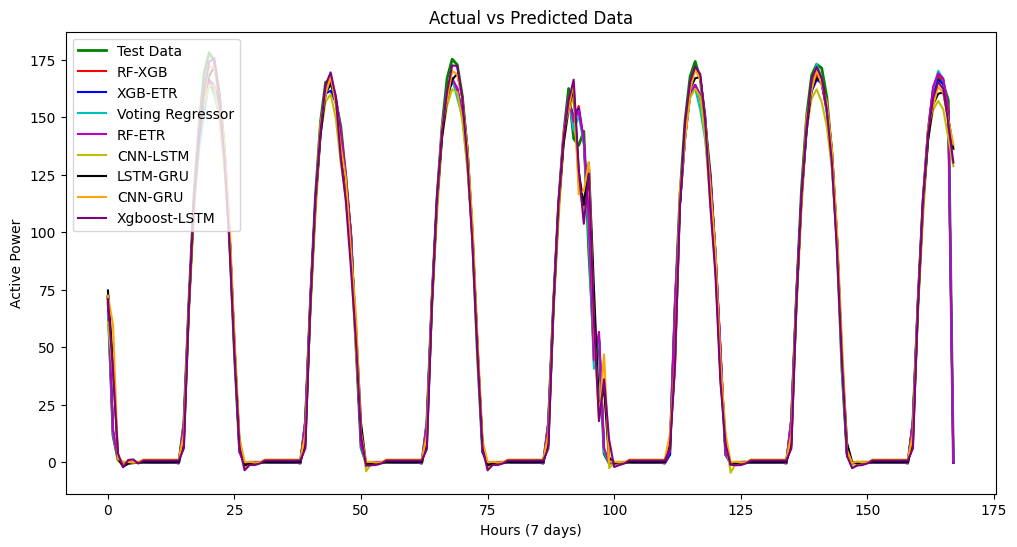

In [ ]:
import matplotlib.pyplot as plt

# Example data points, make sure you have your own data points defined here
y_test11 = y_test[-168:]  # Test data
y_pred12 = meta_preds1[-168:]  # Prediction from model 1
y_pred13 = meta_preds3[-168:]  # Prediction from model 3
y_pred14 = meta_preds4[-168:]  # Prediction from model 4
y_pred15 = meta_preds5[-168:]  # Prediction from model 5
y_pred16 = y_pred3[-168:]  # Prediction from model 3 again (different settings?)
y_pred17 = y_pred5[-168:]  # Prediction from model 5 again (different settings?)
y_pred18 = y_pred6[-168:]  # Prediction from model 6
y_pred19 = predictions7[-168:]  # Prediction from model 7

plt.figure(figsize=(12, 6))

# Plotting test data
plt.plot(range(len(y_test11)), y_test11, 'g', label='Test Data', linewidth=2)

# Plotting predicted data from various models
plt.plot(range(len(y_pred12)), y_pred12, 'r', label='RF-XGB')
plt.plot(range(len(y_pred13)), y_pred13, 'b', label='XGB-ETR')
plt.plot(range(len(y_pred14)), y_pred14, 'c', label='Voting Regressor')
plt.plot(range(len(y_pred15)), y_pred15, 'm', label='RF-ETR')
plt.plot(range(len(y_pred16)), y_pred16, 'y', label='CNN-LSTM')
plt.plot(range(len(y_pred17)), y_pred17, 'k', label='LSTM-GRU')
plt.plot(range(len(y_pred18)), y_pred18, 'orange', label='CNN-GRU')
plt.plot(range(len(y_pred19)), y_pred19, 'purple', label='Xgboost-LSTM')

# Adding labels and legend
plt.title('Actual vs Predicted Data')
plt.xlabel('Hours (7 days)')
plt.ylabel('Active Power')
plt.legend(loc='upper left')  # Adjust legend location to avoid blocking the plot

# Display the plot
plt.show()


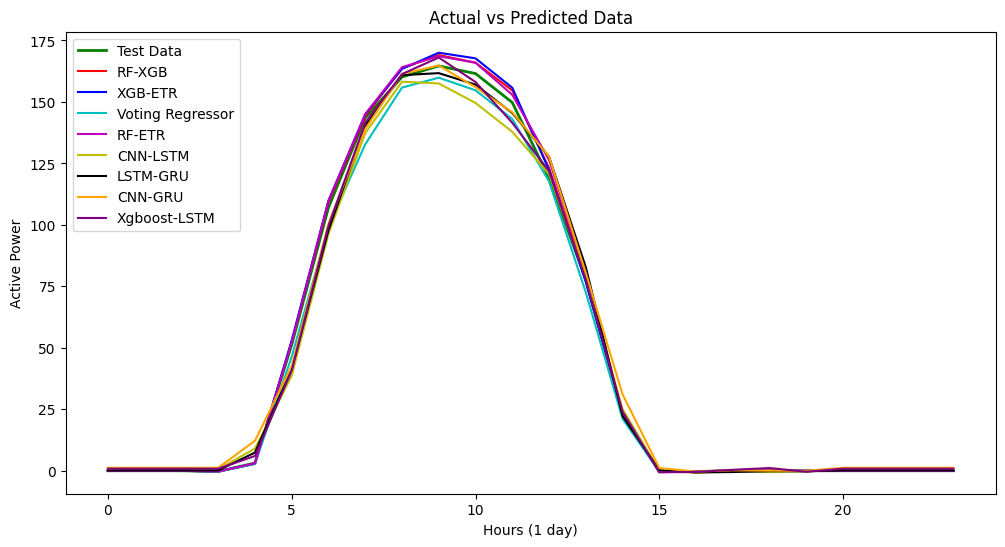

In [ ]:
import matplotlib.pyplot as plt

# Example data points, make sure you have your own data points defined here
y_test21 = y_test[3:27]  # Test data
y_pred22 = meta_preds1[3:27]  # Prediction from model 1
y_pred23 = meta_preds3[3:27]  # Prediction from model 3
y_pred24 = meta_preds4[3:27]  # Prediction from model 4
y_pred25 = meta_preds5[3:27]  # Prediction from model 5
y_pred26 = y_pred3[0:24]  # Prediction from model 3 again (different settings?)
y_pred27 = y_pred5[0:24]  # Prediction from model 5 again (different settings?)
y_pred28 = y_pred6[0:24]  # Prediction from model 6
y_pred29 = predictions7[0:24]  # Prediction from model 7

plt.figure(figsize=(12, 6))

# Plotting test data
plt.plot(range(len(y_test21)), y_test21, 'g', label='Test Data', linewidth=2)

# Plotting predicted data from various models
plt.plot(range(len(y_pred22)), y_pred22, 'r', label='RF-XGB')
plt.plot(range(len(y_pred23)), y_pred23, 'b', label='XGB-ETR')
plt.plot(range(len(y_pred24)), y_pred24, 'c', label='Voting Regressor')
plt.plot(range(len(y_pred25)), y_pred25, 'm', label='RF-ETR')
plt.plot(range(len(y_pred26)), y_pred26, 'y', label='CNN-LSTM')
plt.plot(range(len(y_pred27)), y_pred27, 'k', label='LSTM-GRU')
plt.plot(range(len(y_pred28)), y_pred28, 'orange', label='CNN-GRU')
plt.plot(range(len(y_pred29)), y_pred29, 'purple', label='Xgboost-LSTM')

# Adding labels and legend
plt.title('Actual vs Predicted Data')
plt.xlabel('Hours (1 day)')
plt.ylabel('Active Power')
plt.legend(loc='upper left')  # Adjust legend location to avoid blocking the plot

# Display the plot
plt.show()

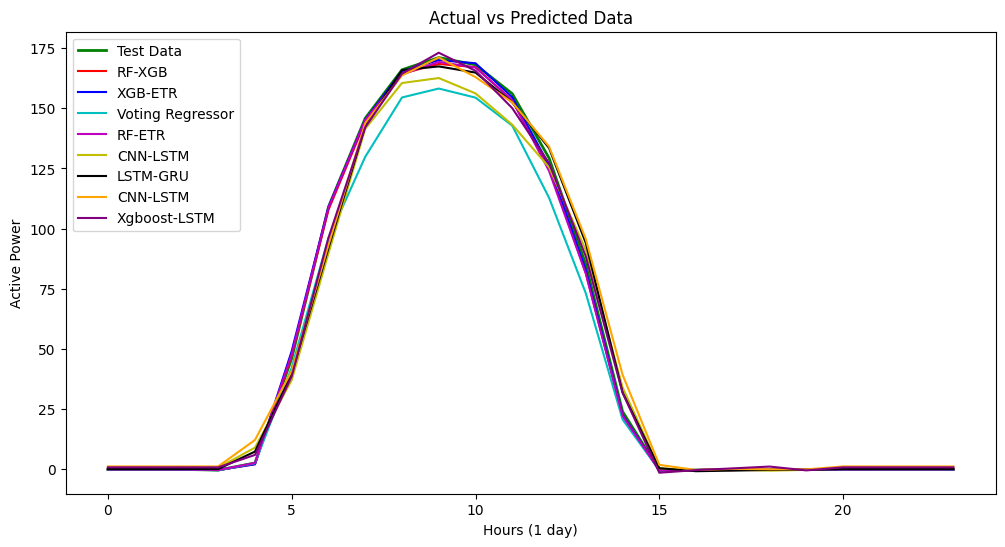

In [ ]:
import matplotlib.pyplot as plt

# Example data points, make sure you have your own data points defined here
y_test21 = y_test[27:51]  # Test data
y_pred22 = meta_preds1[27:51]  # Prediction from model 1
y_pred23 = meta_preds3[27:51]  # Prediction from model 3
y_pred24 = meta_preds4[27:51]  # Prediction from model 4
y_pred25 = meta_preds5[27:51]  # Prediction from model 5
y_pred26 = y_pred3[24:48]  # Prediction from model 3 again (different settings?)
y_pred27 = y_pred5[24:48]  # Prediction from model 5 again (different settings?)
y_pred28 = y_pred6[24:48]  # Prediction from model 6
y_pred29 = predictions7[24:48]  # Prediction from model 7

plt.figure(figsize=(12, 6))

# Plotting test data
plt.plot(range(len(y_test21)), y_test21, 'g', label='Test Data', linewidth=2)

# Plotting predicted data from various models
plt.plot(range(len(y_pred22)), y_pred22, 'r', label='RF-XGB')
plt.plot(range(len(y_pred23)), y_pred23, 'b', label='XGB-ETR')
plt.plot(range(len(y_pred24)), y_pred24, 'c', label='Voting Regressor')
plt.plot(range(len(y_pred25)), y_pred25, 'm', label='RF-ETR')
plt.plot(range(len(y_pred26)), y_pred26, 'y', label='CNN-LSTM')
plt.plot(range(len(y_pred27)), y_pred27, 'k', label='LSTM-GRU')
plt.plot(range(len(y_pred28)), y_pred28, 'orange', label='CNN-LSTM')
plt.plot(range(len(y_pred29)), y_pred29, 'purple', label='Xgboost-LSTM')

# Adding labels and legend
plt.title('Actual vs Predicted Data')
plt.xlabel('Hours (1 day)')
plt.ylabel('Active Power')
plt.legend(loc='upper left')  # Adjust legend location to avoid blocking the plot

# Display the plot
plt.show()